# NLP Challenge: Twitter Sentiment Analysis

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pathlib import Path
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

In [2]:
# Import the machine learning model of your choice
from sklearn.linear_model import LogisticRegression
# Example: from sklearn.naive_bayes import MultinomialNB

# Step 1: Load the Sentiment140 dataset

In [4]:
# Download the dataset from Kaggle and specify the file path
filepath = Path('../Archive/training.1600000.processed.noemoticon.csv')
data = pd.read_csv(filepath, parse_dates=True, infer_datetime_format=True)

# Step 2: Data Preprocessing

In [5]:
# Clean the text data, remove special characters, handle missing values, etc.

tweets_df = pd.DataFrame(data)
# tweets_df.columns = column_names
column_names = [
    'target',
    'ID',
    'Date',
    'flag',
    'username',
    'text'
]
tweets_df.columns = column_names
tweets_df = tweets_df.loc[:, ['ID', 'target', 'Date', 'username', 'text']]


In [6]:
# checking for nulls
tweets_df.isnull().sum()

ID          0
target      0
Date        0
username    0
text        0
dtype: int64

In [7]:
# using regular expression to remove special characters
lemmatizer = WordNetLemmatizer()
import re
def process_text(text): 
    sw = set(stopwords.words('english')) 
    regex = re.compile("[^a-zA-Z ]") 
    re_clean = regex.sub('', text) 
    words = word_tokenize(re_clean) 
    lem = [lemmatizer.lemmatize(word) for word in words] 
    output = ' '.join([word.lower() for word in lem if word.lower() not in sw]) 
    return output

In [8]:
#using lambda x to apply the regex function to every string in a column
tweets_df['text'] = tweets_df['text'].apply(lambda x: process_text(x))

In [9]:
#check my work
tweets_df

,ID,target,Date,username,text
0,1467810672,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,upset cant update facebook texting might cry r...
1,1467810917,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan dived many time ball managed save res...
2,1467811184,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,whole body feel itchy like fire
3,1467811193,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass behaving im mad cant see
4,1467811372,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei whole crew
...,...,...,...,...,...
1599994,2193601966,4,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,woke school best feeling ever
1599995,2193601969,4,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,thewdbcom cool hear old walt interview httpbli...
1599996,2193601991,4,Tue Jun 16 08:40:49 PDT 2009,bpbabe,ready mojo makeover ask detail
1599997,2193602064,4,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,happy th birthday boo alll time tupac amaru sh...


# Step 3: Feature Extraction

In [10]:
# Choose a feature extraction method (e.g., TF-IDF, Gensim, or a pretrained language model) and transform the text data into numerical features.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(tweets_df['text'])
y = tweets_df['target']
X

<1599999x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 9591318 stored elements in Compressed Sparse Row format>

# Step 4: Model Selection and Training

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression) and train it
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
model.score(X_train, y_train)


0.7768398140331784

In [13]:
model.score(X_test, y_test)

0.7738775

In [14]:
# do an f1 score and confusion matrix on the linear regression model to test for more accuracy
from sklearn.metrics import confusion_matrix 
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[150171,  49410],
       [ 41039, 159380]], dtype=int64)

In [15]:
# do a classification report for more in depth accuracy metrics
from sklearn.metrics import classification_report 
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77    199581
           4       0.76      0.80      0.78    200419

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000



# Step 5: Sentiment Analysis

In [16]:
# Perform sentiment analysis on the dataset using your trained model
y_pred = model.predict(X_test)

In [17]:
new_string = "hello"

processed_new = process_text(new_string)

tfidf_new = tfidf_vectorizer.transform([processed_new])

new_predict = model.predict(tfidf_new)
new_predict

array([4], dtype=int64)

In [18]:
keyword = 'apple'
result = tweets_df['text'].str.contains(keyword, case=False, na=False)
apple_df = tweets_df[result]
apple_df

,ID,target,Date,username,text
423,1467918560,0,Mon Apr 06 22:48:32 PDT 2009,jkenneth,treesahquiche okay applepears ive talked peopl...
445,1467926444,0,Mon Apr 06 22:50:48 PDT 2009,ElliotTucker,nasty budget due iphone sent apple today
1387,1468142146,0,Mon Apr 06 23:56:48 PDT 2009,idlehandsclub,woke apples gig wa ace last night seriously ti...
1558,1468180182,0,Tue Apr 07 00:09:03 PDT 2009,georgiesaid,new iphone yay restoring backup stupid apple
1574,1468189190,0,Tue Apr 07 00:11:56 PDT 2009,caaaami,im disneyland ahaha im sad pineapple stand clo...
...,...,...,...,...,...
1596728,2192745764,4,Tue Jun 16 07:29:26 PDT 2009,Saganlives,chocolate banana pancake breakfast today think...
1597791,2193009230,4,Tue Jun 16 07:52:11 PDT 2009,xxwillowundead,eating apple
1598555,2193190692,4,Tue Jun 16 08:07:10 PDT 2009,cdruler,wonders would like win apple voucher squarespace
1598677,2193252234,4,Tue Jun 16 08:12:13 PDT 2009,mariartucker,dumilewis lol c u mightve able find lone banan...


In [19]:
apple_X = tfidf_vectorizer.transform(apple_df['text'])
apple_y = apple_df['target']
X

<1599999x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 9591318 stored elements in Compressed Sparse Row format>

In [20]:
apple_pred = model.predict(apple_X)

In [21]:
apple_report = classification_report(apple_y, apple_pred)
apple_report

'              precision    recall  f1-score   support\n\n           0       0.78      0.76      0.77      1975\n           4       0.74      0.76      0.75      1762\n\n    accuracy                           0.76      3737\n   macro avg       0.76      0.76      0.76      3737\nweighted avg       0.76      0.76      0.76      3737\n'

# Step 6: Visualizations

In [22]:
# Select an AI company or product of your choice and collect tweets related to it
# Use your trained model to predict sentiment on these tweets
def predict_sentiment(text):
    text = tfidf_vectorizer.transform([text])
    sentiment_scores = model.predict(text)
    if sentiment_scores == 0:
        return 'positive'
    elif sentiment_scores == 4:
        return 'negative'
    else:
        return 'neutral'
    
apple_df['sentiment'] = apple_df['text'].apply(predict_sentiment)
apple_df
# Create visualizations to showcase sentiment (e.g., bar charts, word clouds)

# Example: 
# - Visualize sentiment distribution using seaborn or matplotlib.
# - Create word clouds for positive and negative tweets.
# - Generate a bar chart showing sentiment scores for the chosen company/product.

# Additional Tips:
# - Experiment with hyperparameter tuning to improve model performance.
# - Use cross-validation for a more robust evaluation.
# - Write functions to encapsulate repetitive tasks and improve code organization.

# YOUR CODE HERE!

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,ID,target,Date,username,text,sentiment
423,1467918560,0,Mon Apr 06 22:48:32 PDT 2009,jkenneth,treesahquiche okay applepears ive talked peopl...,positive
445,1467926444,0,Mon Apr 06 22:50:48 PDT 2009,ElliotTucker,nasty budget due iphone sent apple today,positive
1387,1468142146,0,Mon Apr 06 23:56:48 PDT 2009,idlehandsclub,woke apples gig wa ace last night seriously ti...,positive
1558,1468180182,0,Tue Apr 07 00:09:03 PDT 2009,georgiesaid,new iphone yay restoring backup stupid apple,positive
1574,1468189190,0,Tue Apr 07 00:11:56 PDT 2009,caaaami,im disneyland ahaha im sad pineapple stand clo...,positive
...,...,...,...,...,...,...
1596728,2192745764,4,Tue Jun 16 07:29:26 PDT 2009,Saganlives,chocolate banana pancake breakfast today think...,negative
1597791,2193009230,4,Tue Jun 16 07:52:11 PDT 2009,xxwillowundead,eating apple,negative
1598555,2193190692,4,Tue Jun 16 08:07:10 PDT 2009,cdruler,wonders would like win apple voucher squarespace,positive
1598677,2193252234,4,Tue Jun 16 08:12:13 PDT 2009,mariartucker,dumilewis lol c u mightve able find lone banan...,positive


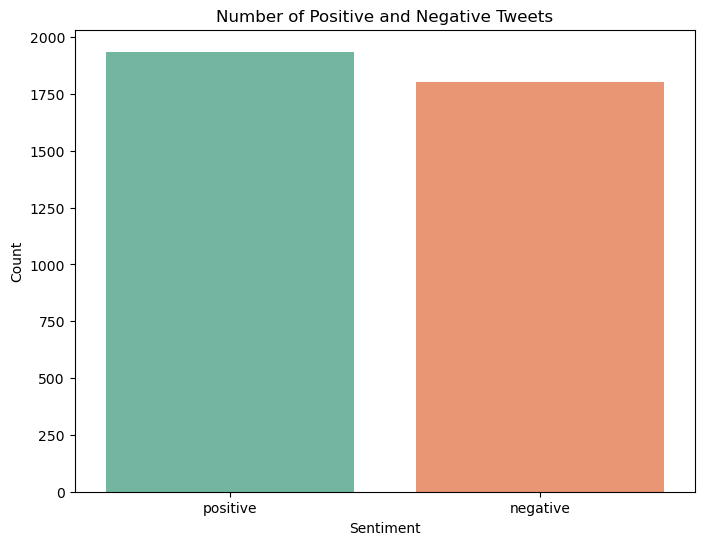

In [24]:
sentiment_counts = apple_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Tweets')
plt.show()

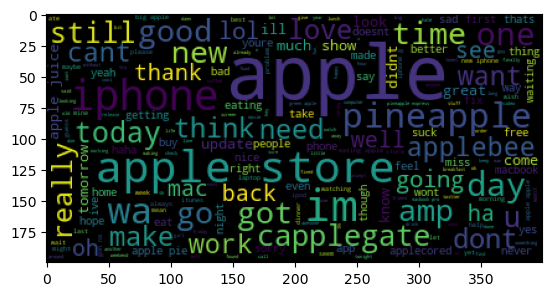

In [29]:
big_string = ' '.join(apple_df['text'])
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Evaluation

In [45]:
accuracy_score(y_test, y_pred)

0.7738775

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77    199581
           4       0.76      0.80      0.78    200419

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000



In [77]:
# Evaluate your model's performance using metrics like accuracy, precision, recall, and F1-score.

# Example:
accuracy = (0.77)
precision = (0.79, 0.76, 0.77)
recall = (0.75, 0.8, 0.77)
f1 = (0.77, 0.78, 0.77)


# YOUR CODE HERE!


In [81]:
metrics = ['accuracy', 'precision', 'f1 score']
values = [(0.77,), (0.79, 0.76, 0.77), (0.77, 0.78, 0.77)]

---